In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#import log files into dataframes
def import_logs():
    df_tl = pd.read_csv('train_log.csv')
    df_m = pd.read_csv('train_metric_log.csv')
    return df_tl, df_m

#df_tl, df_m = import_logs();

In [3]:
#calculate acceleration, coast and deceleration time for a given train
def travel_time_breakdown(train_id, df_tl):
    dfi = df_tl[df_tl['id'] == train_id]
    first = True
    tlist = dfi['time'].to_list()
    slist = dfi['speed'].to_list()
    accelt = 0
    coastt = 0
    decelt = 0
    waitt = 0
    eps = 0.0000001
    for j in range(1,len(tlist)):
        deltat = tlist[j] - tlist[j-1]
        deltas = slist[j] - slist[j-1]
        if deltas < -eps:
            decelt += deltat
        elif deltas > eps:
            accelt += deltat
        elif abs(slist[j]) > eps:
            coastt += deltat
        else:
            waitt += deltat
    return accelt, coastt, decelt, waitt
    

The code below provides an analysis of the summary log file (train_metric_lg.csv)

In [4]:
warmup = 10
_, dfm_full = import_logs()
dfm = dfm_full[dfm_full['completion_time'] >= 20]

Text(0, 0.5, 'total waiting time (hr)')

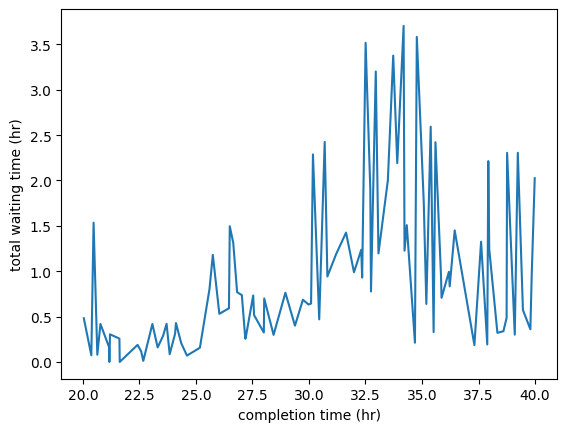

In [5]:
#generate a scatter plot of waiting times
plt.plot(dfm['completion_time'].to_list(), dfm['total_wait_time'].to_list())
plt.xlabel('completion time (hr)')  
plt.ylabel('total waiting time (hr)')

Text(0, 0.5, 'Frequency')

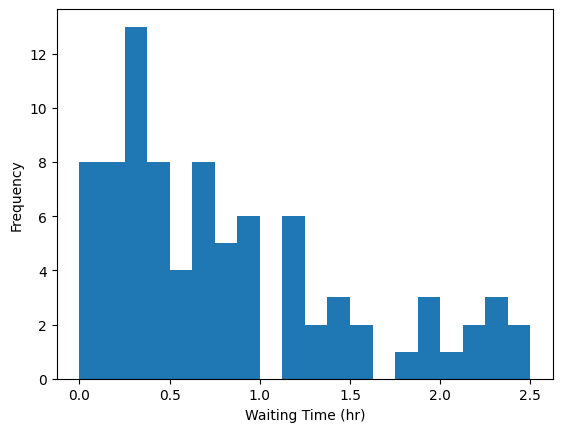

In [6]:
#plt.hist(dfm['total_wait_time'].to_list(), bins= 20)
delta_b = 2.5/20.0
mybins = np.arange(0, 2.5 + delta_b, delta_b)
plt.hist(dfm['total_wait_time'].to_list(), bins= mybins)
plt.xlabel('Waiting Time (hr)')
plt.ylabel('Frequency')

In [7]:
#calculate some summary statistics
import statistics as st
import math

Tspan = math.ceil(max(dfm['completion_time'])) - warmup
tot_trips = dfm['id'].count();
print(f'Tspan = {Tspan}')
print(f'trips complete per hr = {tot_trips / Tspan}')

avg_waiting_time = st.mean(dfm['total_wait_time'].to_list())
print(f'average waiting time = {avg_waiting_time} hr = {60*avg_waiting_time} mins')

Tspan = 30
trips complete per hr = 3.033333333333333
average waiting time = 0.9875158901098902 hr = 59.25095340659341 mins


The code below is for cross-checking timing breakdown and speed profile of individual trains, it requires the full train motion log file (train_log.csv)

In [28]:
train = 44

In [29]:

df_tl, df_m = import_logs()
trt = travel_time_breakdown(train,df_tl)

print(trt, sum(trt))

(0.7151499999999995, 0.6551000000000027, 0.3573209999999971, 1.1426920000000003) 2.8702629999999996


In [30]:
#speed profile plot
def speed_profile_plot(train_id, df_tl):
    dfi = df_tl[df_tl['id'] == train_id]
    tlist = dfi['time'].to_list()
    slist = dfi['speed'].to_list()
    return tlist, slist


Text(0, 0.5, 'Speed (km/hr)')

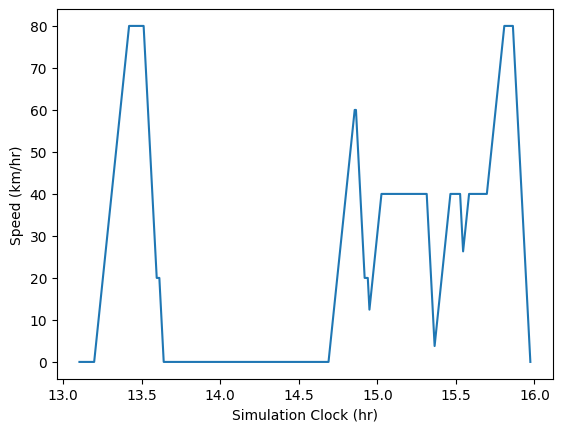

In [31]:
df_tl, df_m = import_logs();
tlist, slist = speed_profile_plot(train, df_tl)
plt.plot(tlist,slist)
plt.xlabel('Simulation Clock (hr)')
plt.ylabel('Speed (km/hr)')

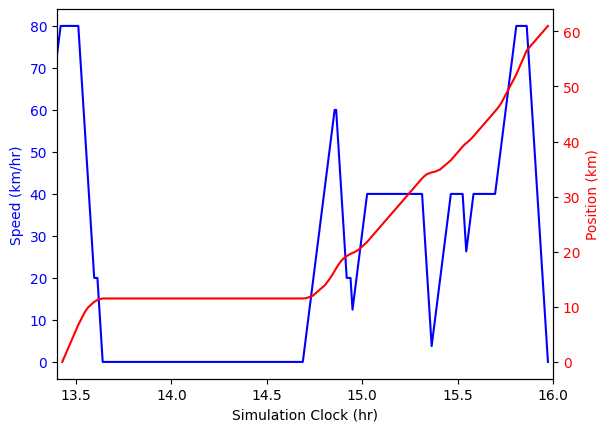

In [33]:
df_tc = pd.read_csv('train_chart.csv')
df_i = df_tc[df_tc['train'] == train]
ti2 = df_i['time'].to_list()
diA = df_i[df_i['corridor_id'] == 1]['chainage'].to_list()
diB = df_i[df_i['corridor_id'] == 0]['chainage'].to_list()
diB_shift = [d + max(diA) for d in diB]
di = diA + diB_shift    #list concatenation

ti1, spi = speed_profile_plot(train, df_tl)


fig, ax1 = plt.subplots()
x1, y1 = ti1, spi
x2, y2 = ti2, di

# Plot first series on primary y-axis
ax1.plot(x1, y1, color='blue', label='Series 1')
ax1.set_xlabel('Simulation Clock (hr)')
ax1.set_ylabel('Speed (km/hr)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis
ax2 = ax1.twinx()
ax2.plot(x2, y2, color='red', label='Series 2')
ax2.set_ylabel('Position (km)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Optional: combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
#ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.xlim(13.4, 16)
plt.show()
#print(min(x2))

